In [ ]:
import pandas as pd

data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

지난번 사용한 resumetable (가져옴)

In [ ]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [ ]:
summary = resumetable(train)
summary

데이터 세트 형상: (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

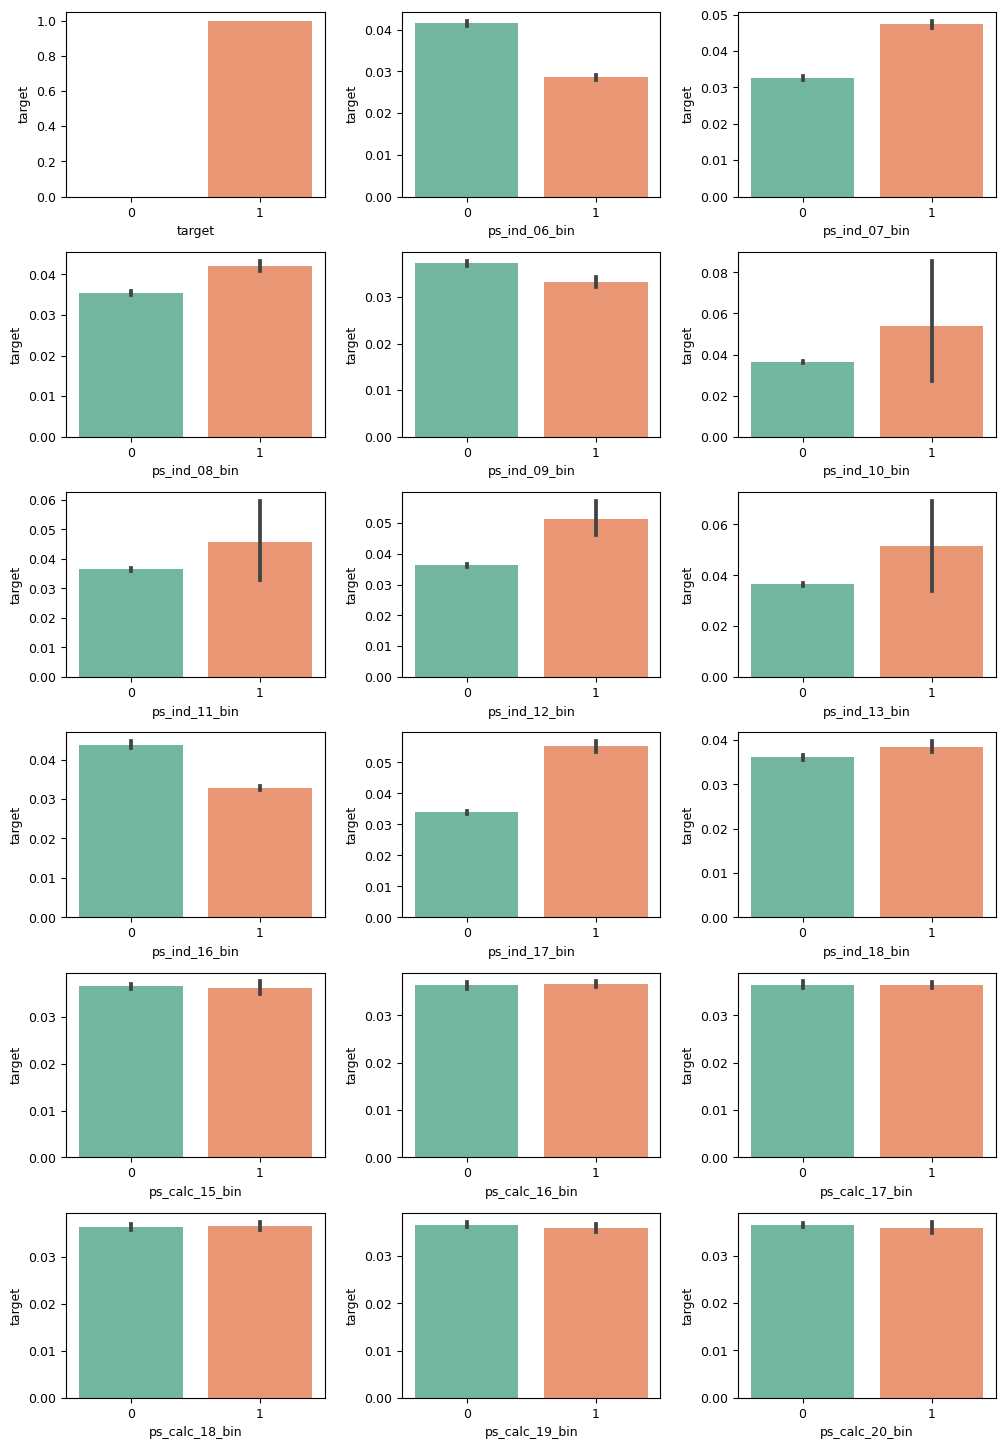

In [ ]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

Calc 부분은 의미가 없음

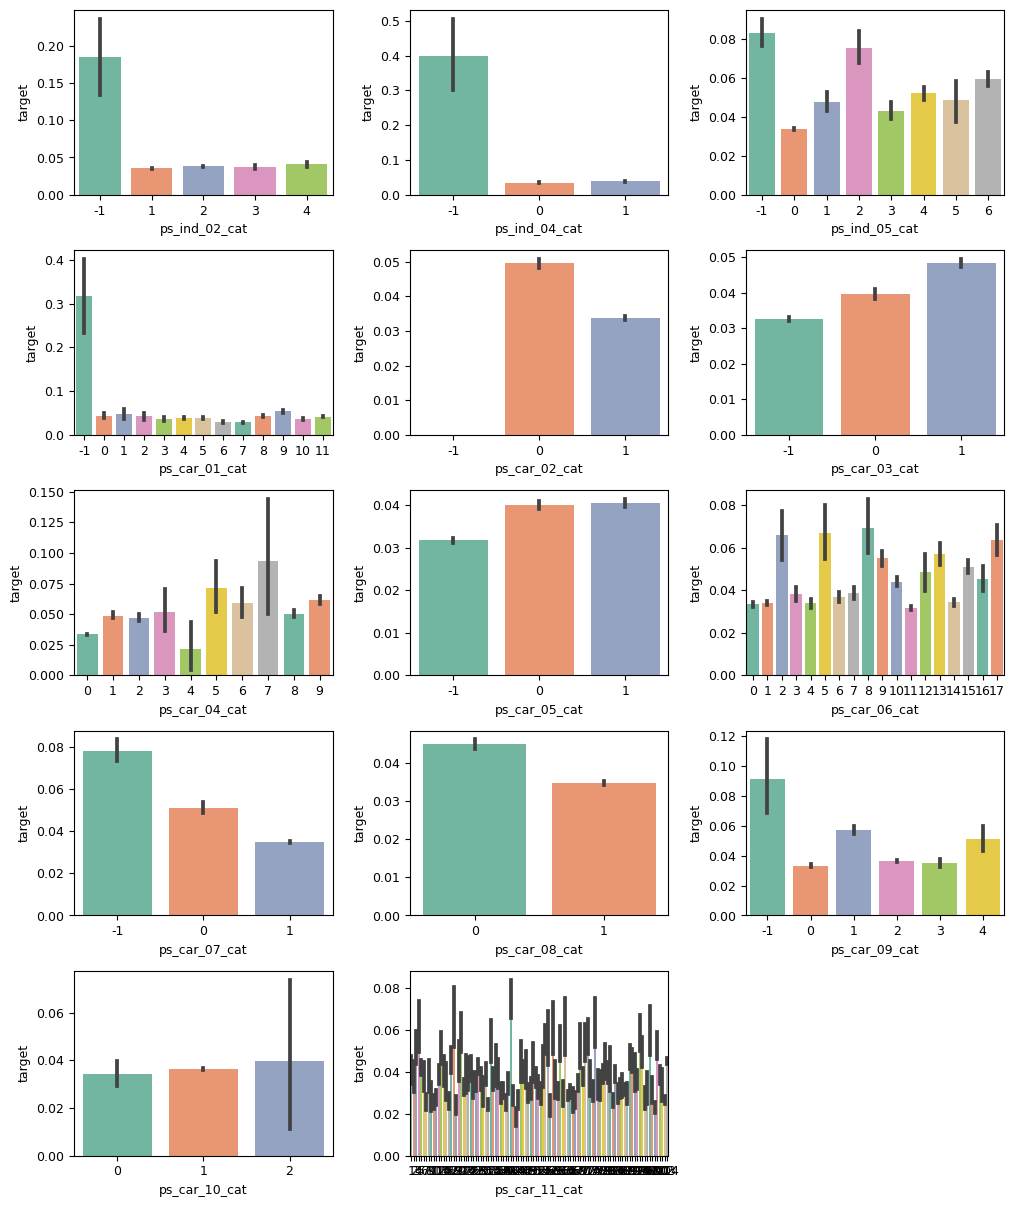

In [ ]:
bin_features = summary[summary['데이터 종류'] == '명목형'].index
plot_target_ratio_by_features(train, bin_features, 6, 3)

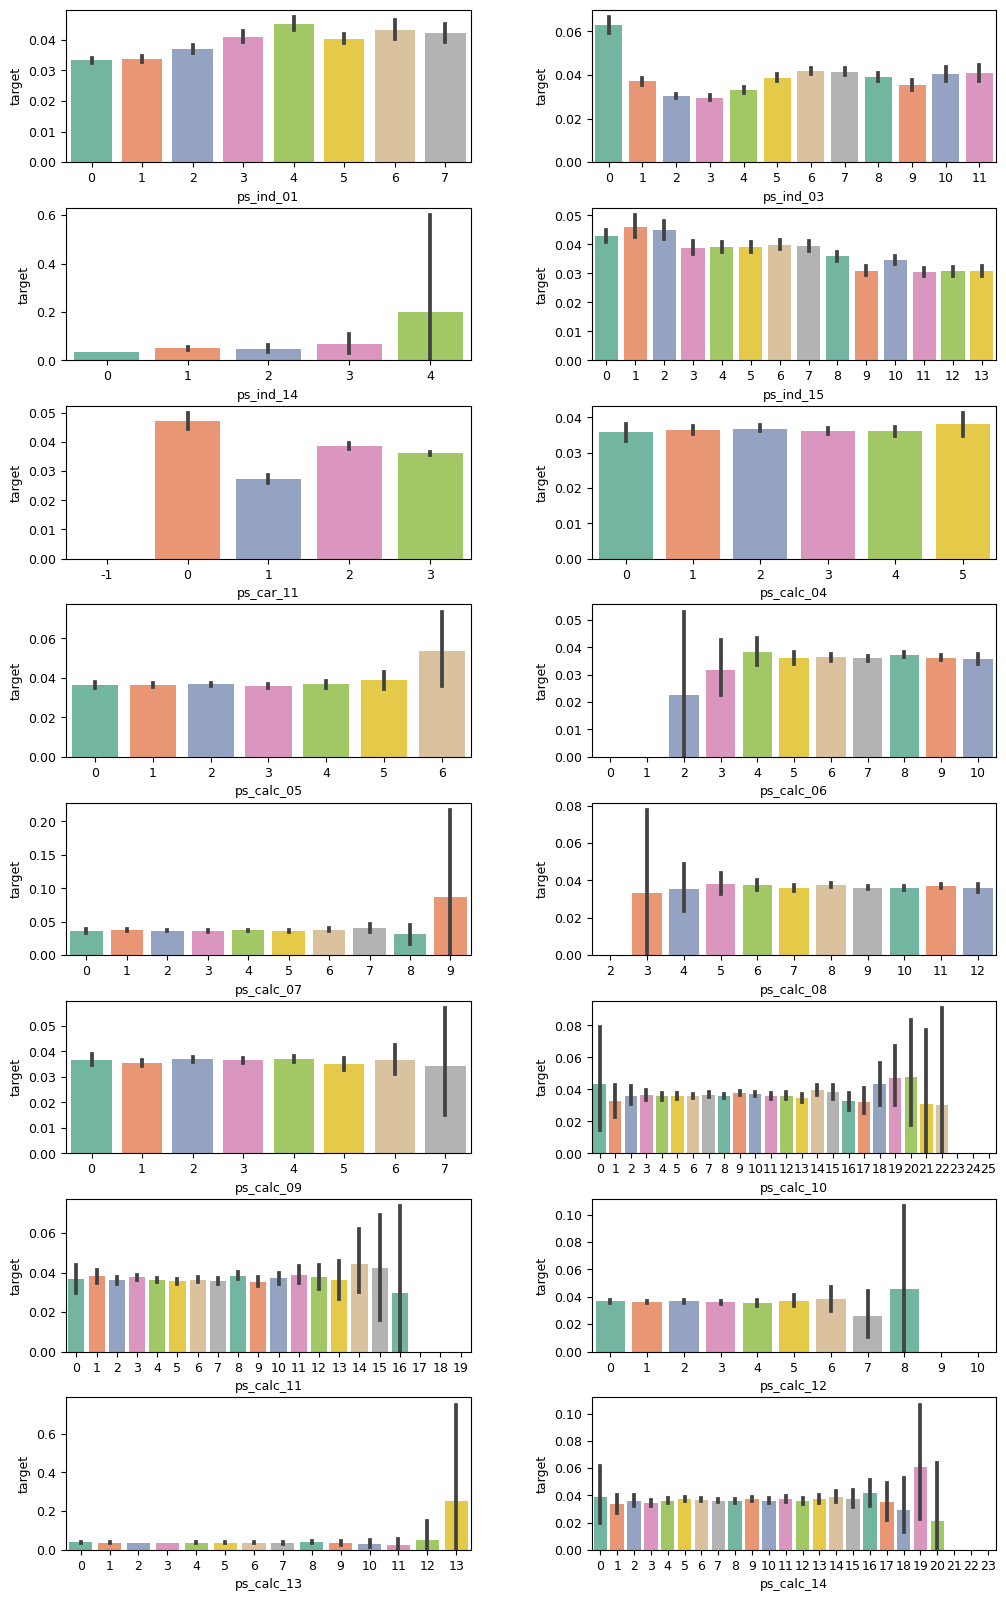

In [ ]:
bin_features = summary[summary['데이터 종류'] == '순서형'].index
plot_target_ratio_by_features(train, bin_features, 8, 2, (12, 20))

Calc 부분은 크게 의미가 없음

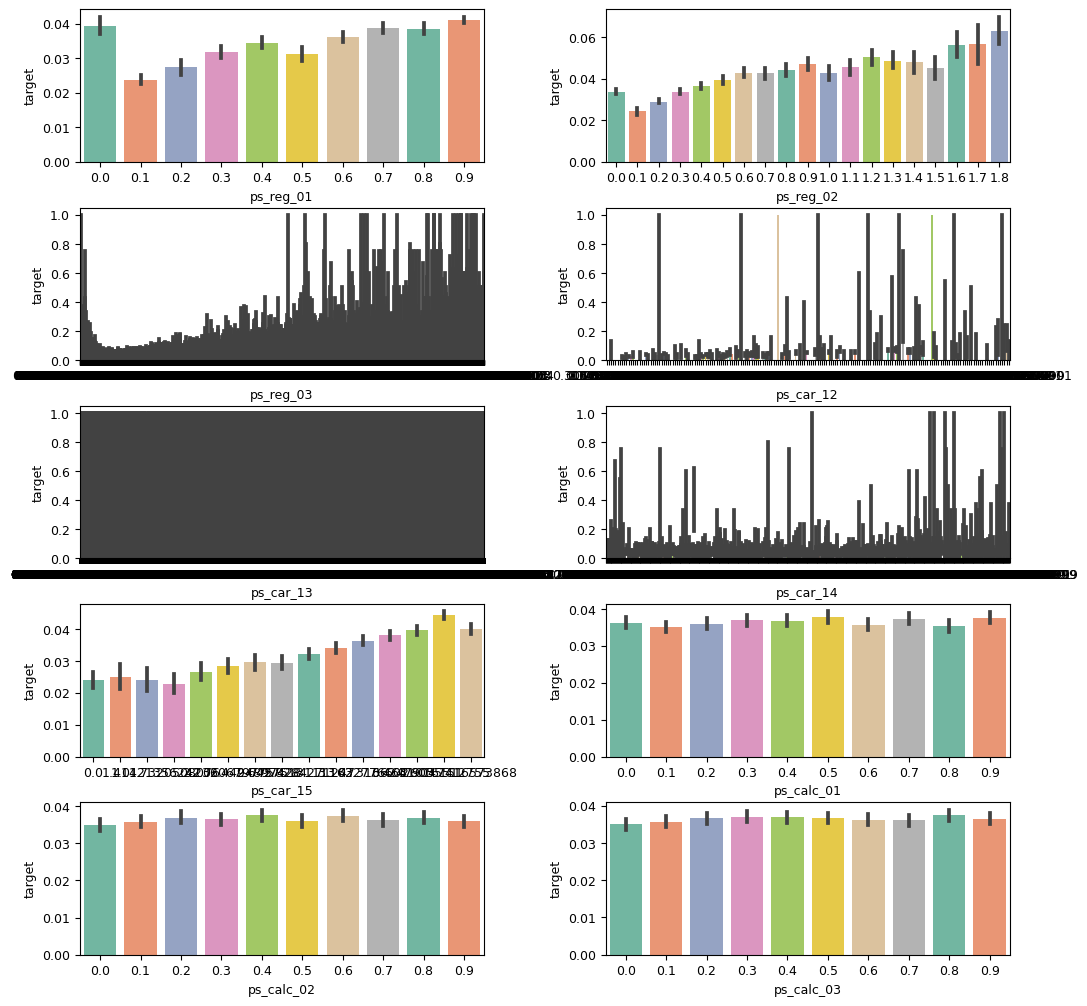

In [ ]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index

plt.figure(figsize=(12, 16))
grid = girdspec.GridSpec(5, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5)
    
    ax = plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10)

결측값 없애주고 히트맵 확인하기 (시간 너무 오래 걸려서 포기)

In [ ]:
train_copy = train.copy().replace(-1, np.NaN).dropna()

plt.figure(figsize=(10, 8))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd')